# LinkedIn Learning
# Advanced Python  -> Working with Databases_1

## 1. Using SQLite in Python
### A. Creating an SQLite database

In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect('movies.db')
cursor = connection.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS Movies (Title TEXT, Director TEXT, Year INT)''')

connection.commit()
connection.close()

### B. Insering first record in SQLite database

In [3]:
connection = sqlite3.connect('movies.db')
cursor = connection.cursor()

In [4]:
cursor.execute('''INSERT INTO Movies VALUES('Taxi Driver', 'Martin Scorsese', 1976)''')
cursor.execute(''' SELECT * FROM Movies ''')

In [5]:
print(cursor.fetchone())

('Taxi Driver', 'Martin Scorsese', 1976)


In [6]:
connection.commit()
connection.close()

### C. Adding multiple records at a time to an SQLite database

In [7]:
connection = sqlite3.connect('movies.db')
cursor = connection.cursor()

In [8]:
famous_films = [('Pulp Fiction', 'Quentin Tarantino', 1994), ('Back to the Future', 'Robert Zemeckis', 1985), ('Moonrise Kingdom', 'Wes Anderson', 2012)]

In [9]:
cursor.executemany('INSERT INTO Movies VALUES (?,?,?) ', famous_films)

In [10]:
cursor.execute(''' SELECT * FROM Movies ''')

In [11]:
print(cursor.fetchall())

[('Taxi Driver', 'Martin Scorsese', 1976), ('Pulp Fiction', 'Quentin Tarantino', 1994), ('Back to the Future', 'Robert Zemeckis', 1985), ('Moonrise Kingdom', 'Wes Anderson', 2012)]


In [12]:
connection.commit()
connection.close()

### D. Filtering Records in an SQLite database

In [13]:
connection = sqlite3.connect('movies.db')
cursor = connection.cursor()

In [14]:
release_year  = (1985, )

In [15]:
cursor.execute("SELECT * FROM Movies WHERE year=?", release_year)

In [16]:
print(cursor.fetchall())

[('Back to the Future', 'Robert Zemeckis', 1985)]


In [17]:
connection.commit()
connection.close()

### E. What is SQLAlchemy?

#### ORM -> Object-Relational Mapping
#### ORMs helps to work with databases in a more pythonic way

##### Various libraries implement ORM-like Functionality

##### SQLAlchemy is one of the most popular ORMs for Realtional Databases in Python

##### SQLAlchemy works with varying web frameworks and SQLite, MySQL, and Postgres

##### SQLAlchemy is a large SQL toolkit with lots of different components

##### The 2 largest components are SQLAlchemy Core and SQLAlchemy ORM

##### SQLAlchemy Core has a schema-centric view while SQLAlchemy ORM uses an object-centric view

#### PROS:-
##### Abstract Database Layer
##### Speed up Development
##### Easier to prototype with
##### Fast queries out of the box

#### CONS:-
##### Shifts the Database comlexity into the Application Code rather than keeping it separate 
##### Can prevent one from understanding what SQL is doing under the hood

#### SQLAlchemy 2.0 
##### Core and ORM are becoming more integrated 
##### SQLAlchmey 2.0 is still in beta and being finalized

### F. Setting up a virtual environment for SQLAlchemy

In [22]:
!python -m venv sqlalchemy-workspace

In [33]:
!cd sqlalchemy-workspace

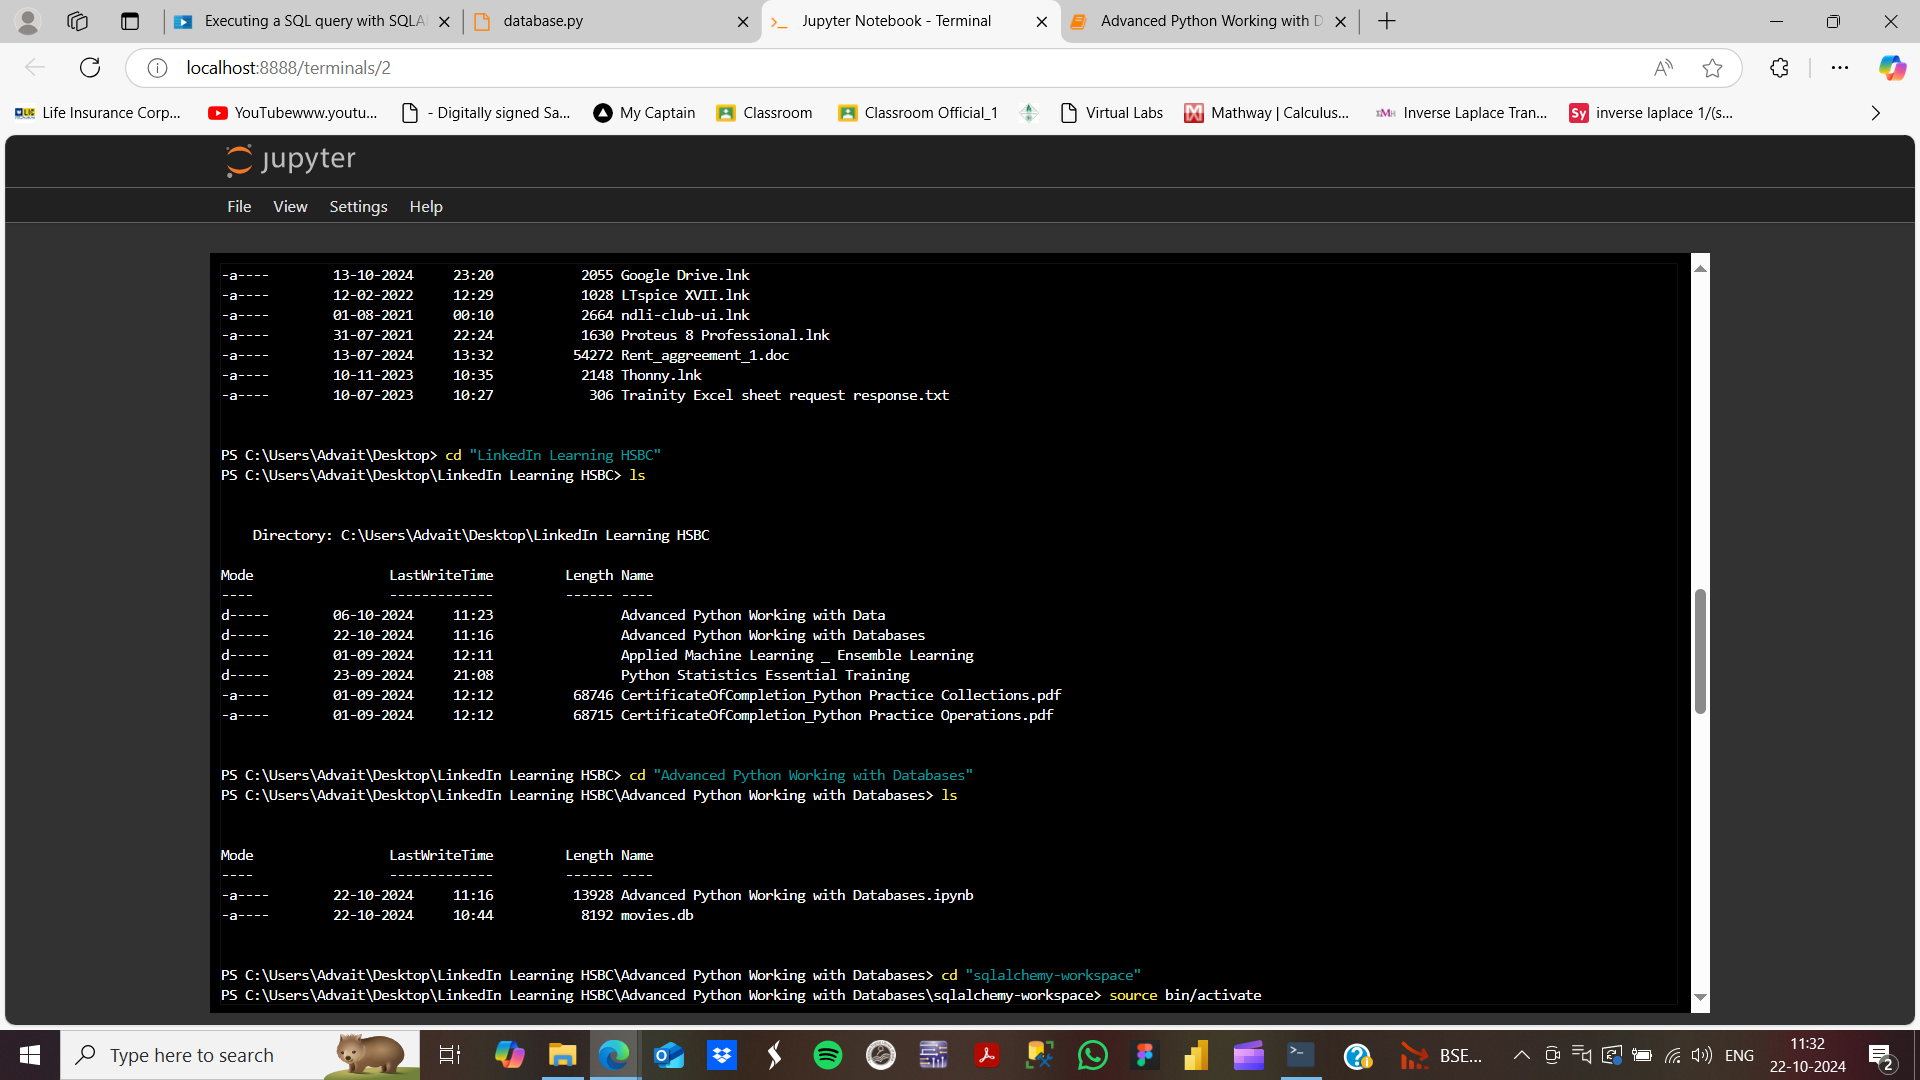

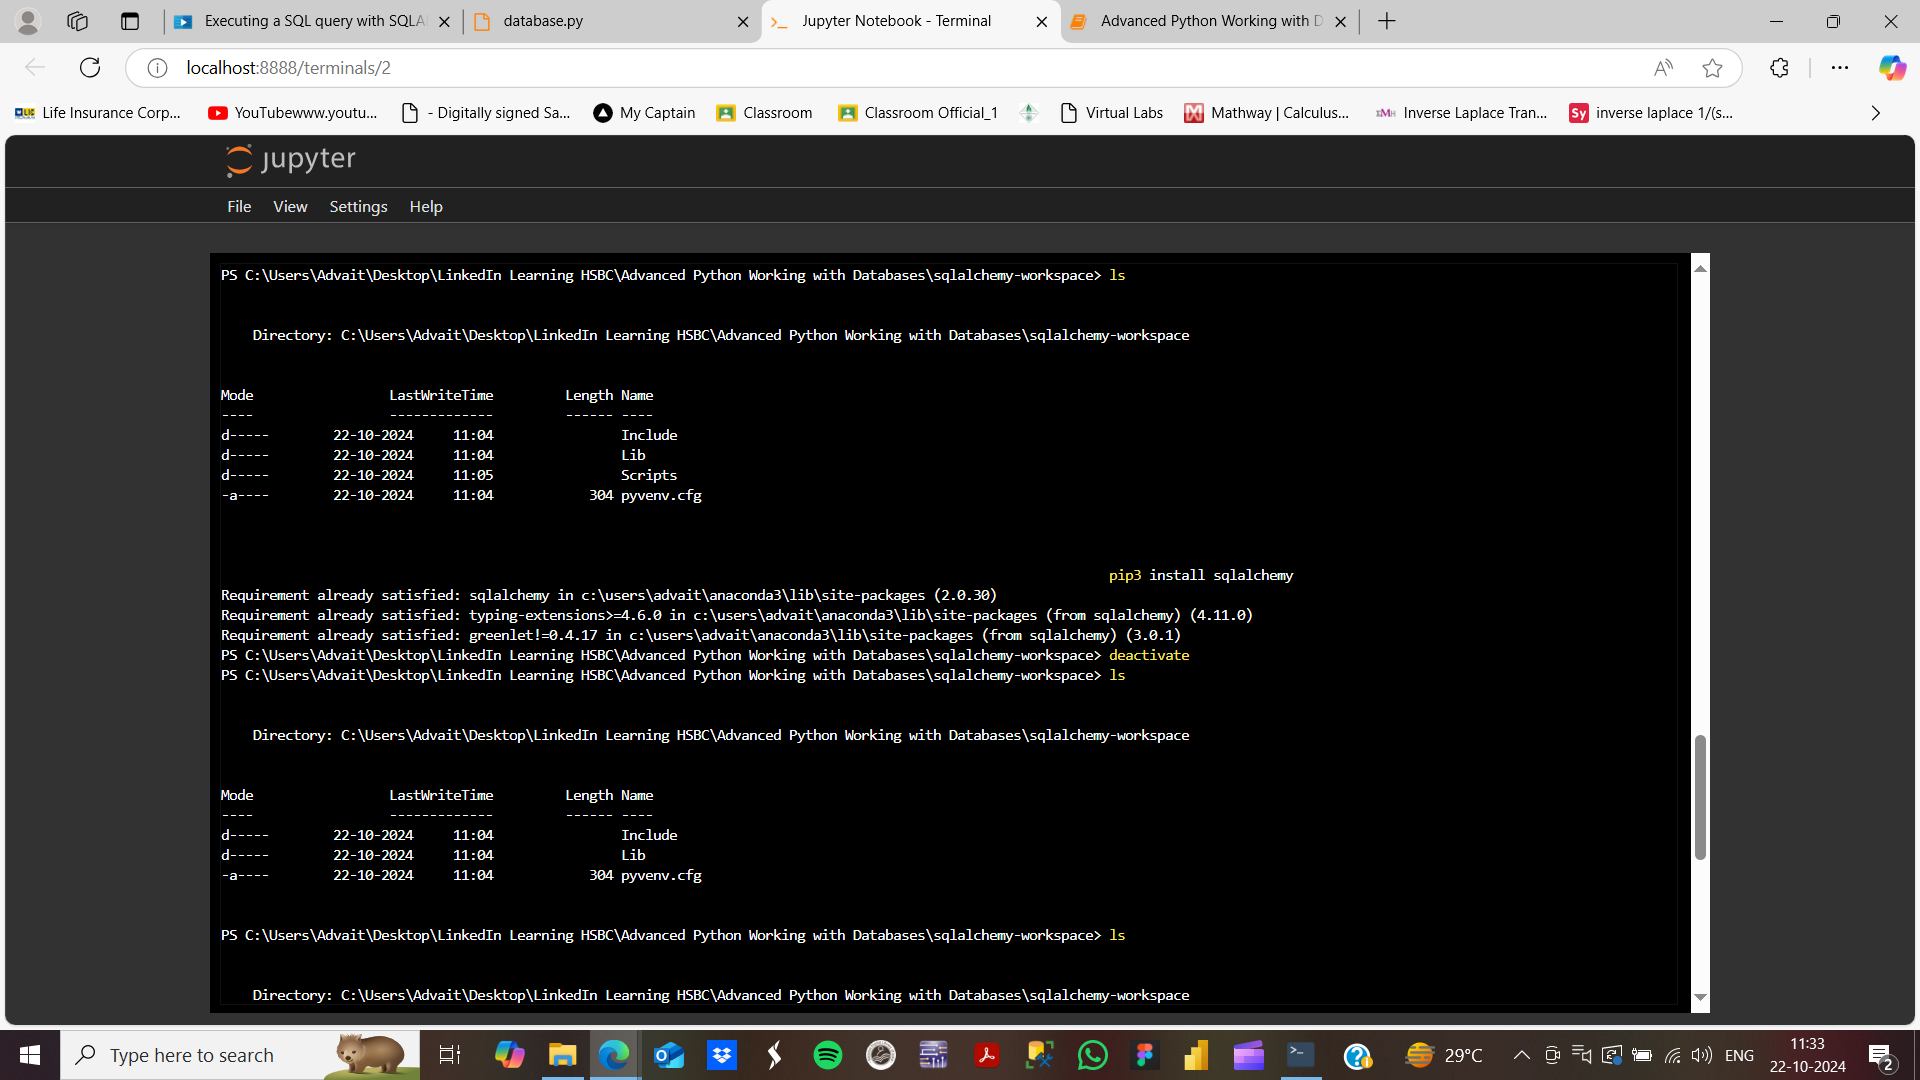

### G. Executing a SQL query with SQLAlchemy

In [41]:
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///movies.db', echo = True)

with engine.connect() as conn:
    result = conn.execute(sqlalchemy.text("SELECT * FROM Movies"))
    for row in result:
        print(row)


2024-10-22 11:32:09,361 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-22 11:32:09,364 INFO sqlalchemy.engine.Engine SELECT * FROM Movies
2024-10-22 11:32:09,364 INFO sqlalchemy.engine.Engine [generated in 0.00290s] ()
('Taxi Driver', 'Martin Scorsese', 1976)
('Pulp Fiction', 'Quentin Tarantino', 1994)
('Back to the Future', 'Robert Zemeckis', 1985)
('Moonrise Kingdom', 'Wes Anderson', 2012)
2024-10-22 11:32:09,411 INFO sqlalchemy.engine.Engine ROLLBACK


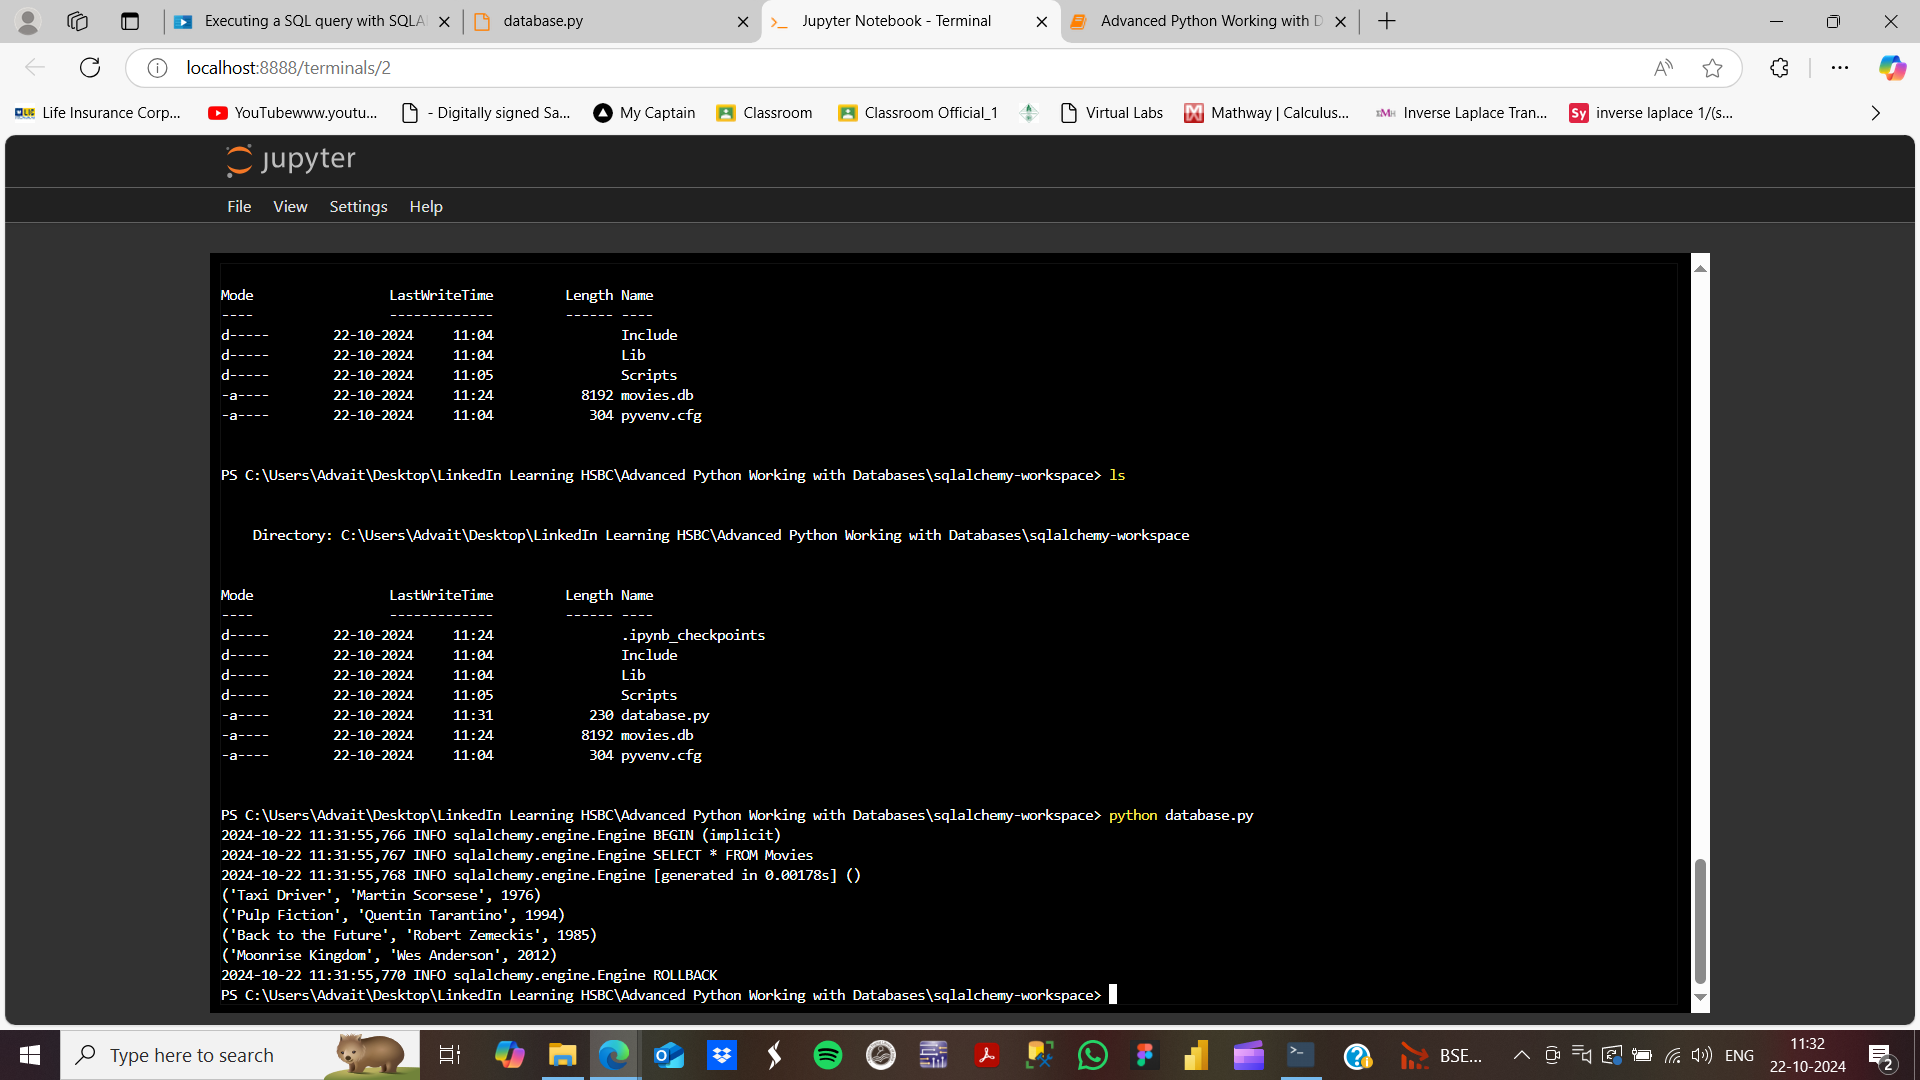

### H. Using the SQL expression language to write maintainable code

In [42]:
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///movies.db', echo = True)

metadata = sqlalchemy.MetaData()

movies_table = sqlalchemy.Table("Movies", metadata,
                                sqlalchemy.Column("title", sqlalchemy.Text),
                                sqlalchemy.Column("director", sqlalchemy.Text),
                                sqlalchemy.Column("year", sqlalchemy.Integer))

metadata.create_all(engine)

with engine.connect() as conn:
    for row in conn.execute(sqlalchemy.select(movies_table)):
        print(row)

2024-10-22 11:46:27,146 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-22 11:46:27,148 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Movies")
2024-10-22 11:46:27,149 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-10-22 11:46:27,154 INFO sqlalchemy.engine.Engine COMMIT
2024-10-22 11:46:27,162 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-22 11:46:27,163 INFO sqlalchemy.engine.Engine SELECT "Movies".title, "Movies".director, "Movies".year 
FROM "Movies"
2024-10-22 11:46:27,166 INFO sqlalchemy.engine.Engine [generated in 0.00445s] ()
('Taxi Driver', 'Martin Scorsese', 1976)
('Pulp Fiction', 'Quentin Tarantino', 1994)
('Back to the Future', 'Robert Zemeckis', 1985)
('Moonrise Kingdom', 'Wes Anderson', 2012)
2024-10-22 11:46:27,169 INFO sqlalchemy.engine.Engine ROLLBACK


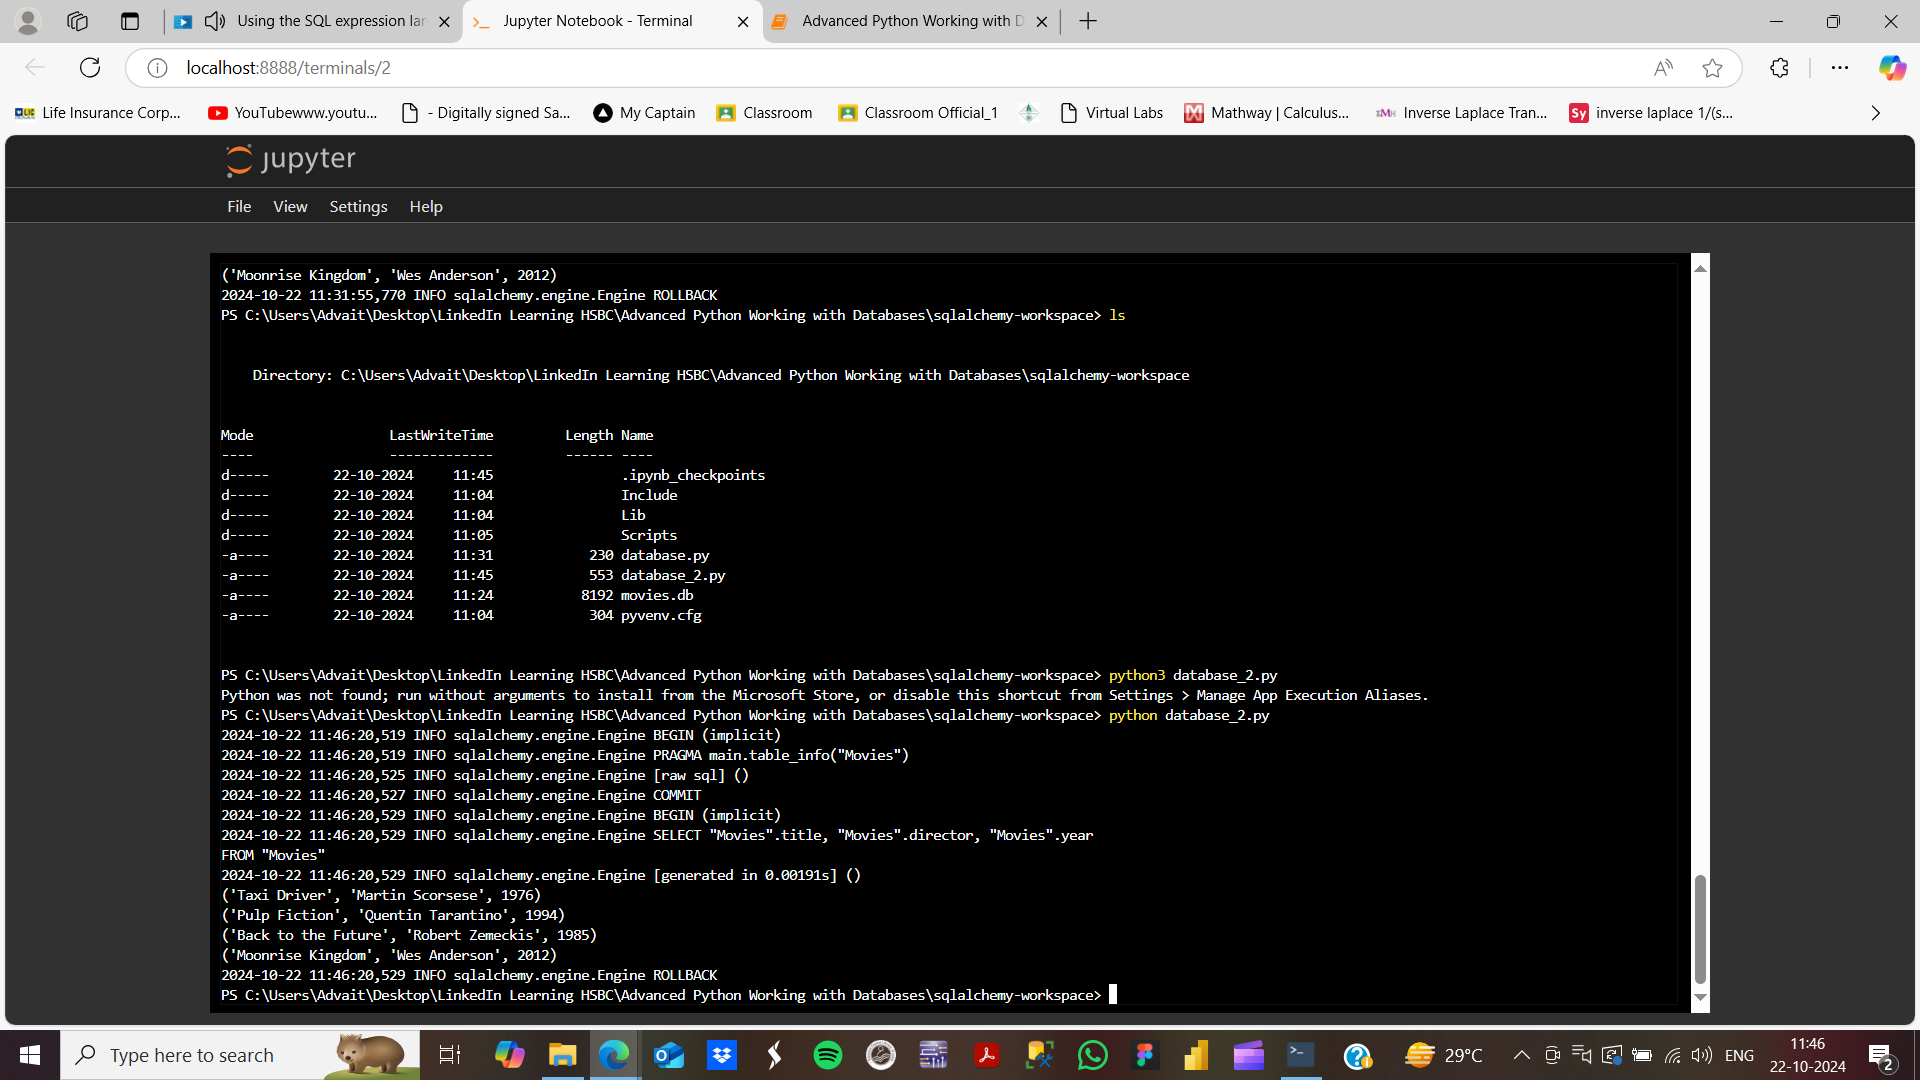

### I. Challenge 1 : Create an SQLite database

In [44]:
import sqlite3

connection = sqlite3.connect('user-sqlite.db')

cursor = connection.cursor()

cursor.execute('CREATE TABLE IF NOT EXISTS Users(user_id INTEGER PRIMARY KEY AUTOINCREMENT, first_name TEXT, last_name TEXT, email TEXT)')

users_to_insert = [("Advait", "Chavan", "advaitchavan@gmail.com"),
                  ("Alex", "Payne", "alex.payne@hotmail.com"),
                  ("Sarah","Anderson","sarah.anderson@live.com"),
                  ("James", "Wencky", "james.wencky@gmail.com")]

cursor.executemany('INSERT INTO Users(first_name, last_name, email) VALUES(?,?,?)', users_to_insert)

cursor.execute('SELECT * FROM Users')

print(cursor.fetchall())

connection.commit()
connection.close()

[(1, 'Advait', 'Chavan', 'advaitchavan@gmail.com'), (2, 'Alex', 'Payne', 'alex.payne@hotmail.com'), (3, 'Sarah', 'Anderson', 'sarah.anderson@live.com'), (4, 'James', 'Wencky', 'james.wencky@gmail.com')]
